In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
delivery=pd.read_csv('deliveries.csv')

In [2]:
#QUESTION 1

# refference : https://www.dummies.com/education/math/statistics/how-to-calculate-percentiles-in-statistics/

def calculate_percentile(numbers,fraction) :
    
    if fraction<0 or fraction>100 :
        return "PERCENTILE CAN ONLY BE IN RANGE [0,100]"
    
    else :
        
        numbers=sorted(numbers)
    
        if fraction==0 :
            return numbers[0]

        elif fraction==100 :
            return numbers[-1]

        else :
            length=len(numbers)
            part=(fraction/100)*length
            r_part=round(part)
            if int(part)!=part :
                return numbers[r_part]
            else :
                return (numbers[r_part-1]+numbers[r_part])/2

def read() :
    
    num=input("Enter Numbers Seperated By Space : ")
    
    numbers=[float(i) for i in num.split()]
    
    return numbers

numbers=read()

iqr=calculate_percentile(numbers,75)-calculate_percentile(numbers,25)

print("IQR :",iqr)

Enter Numbers Seperated By Space : 50 20 10 40 30
IQR : 30.0


(array([ 19.,   4.,  24.,  71., 211., 463., 464., 221.,  45.,   6.]),
 array([  2. ,  28.1,  54.2,  80.3, 106.4, 132.5, 158.6, 184.7, 210.8,
        236.9, 263. ]),
 <a list of 10 Patch objects>)

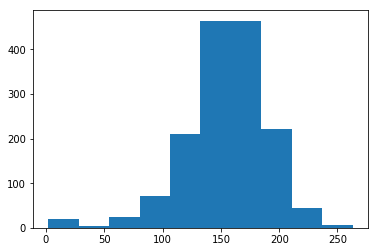

In [9]:
#QUESTION 2

required_data=delivery[delivery['total_runs']>0][['match_id','inning','total_runs']]
required_values=required_data.groupby(['match_id','inning'])['total_runs'].sum().values
plt.hist(required_values)

bowler
DW Steyn            6.226364
M Muralitharan      6.239392
A Kumble            6.300613
SW Tait             6.365714
RE van der Merwe    6.408791
R Ashwin            6.418049
DP Nannes           6.429197
GD McGrath          6.439024
MA Starc            6.463054
SP Narine           6.524249
dtype: float64

0.34352410583251164


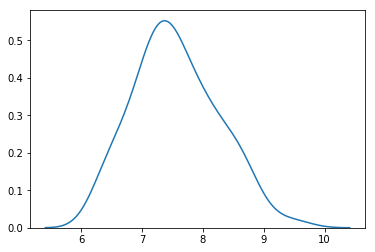

In [86]:
#QUESTION 3

data=delivery[['bowler','noball_runs','batsman_runs']]

legal_balls_bowled=data[data['noball_runs']==0].groupby('bowler').size()
legal_balls_atleast_300=balls_bowled[balls_bowled>=300]
legal_balls_atleast_300_names=balls_atleast_300.index.tolist()

required_data=data[data['bowler'].isin(legal_balls_atleast_300_names)]

runs_conceeded=required_data.groupby('bowler')['batsman_runs'].sum()
overs_bowled=required_data[required_data['noball_runs']==0].groupby('bowler').size()/6

economy_rate=runs_conceeded/overs_bowled

print(economy_rate.sort_values().head(10))

print()
print(economy_rate.skew())

sns.kdeplot(economy_rate)

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
dtype: int64

1.2872286683523246


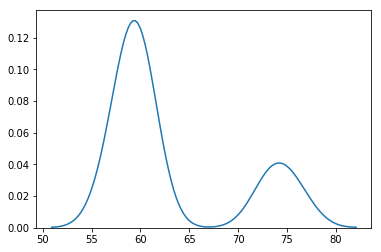

In [119]:
#QUESTION 4

#positively skewed

# No : 1 -> Number of matches played in each season

matches=pd.read_csv('matches.csv')

merged_data=matches.merge(delivery,left_on='id',right_on='match_id')

season_match=merged_data[['season','id']].drop_duplicates('id',keep='first')

x=season_match.groupby('season').size()

print(x)

print()
print(x.skew())

sns.kdeplot(x)

KD Karthik        109
SK Raina           99
MS Dhoni           98
AB de Villiers     93
RV Uthappa         84
RG Sharma          82
KA Pollard         76
V Kohli            73
PA Patel           69
S Dhawan           68
Name: fielder, dtype: int64

3.000777221870206


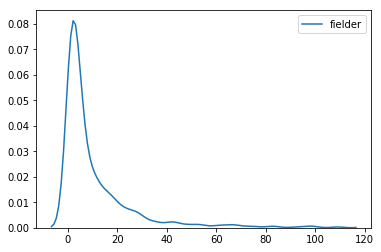

In [121]:
# No : 2 -> Number of catches taken by each fielder

catch=delivery[delivery['dismissal_kind']=='caught']['fielder'].value_counts()

print(catch.head(10))

print()
print(catch.skew())

sns.kdeplot(catch)

bowler
A Ashish Reddy     18
A Chandila         11
A Choudhary         5
A Flintoff          2
A Joseph            6
A Kumble           45
A Mishra          156
A Mithun            7
A Nehra           106
A Nel               1
dtype: int64

2.2436583218942268

<class 'pandas.core.series.Series'>


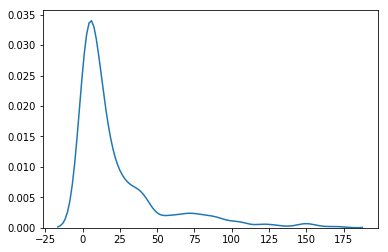

In [18]:
# No : 3 -> Wickets taken by each bowler

bowlers=delivery[(delivery['player_dismissed'].isnull()==False) & (delivery['dismissal_kind']!='run out')]
x=bowlers.groupby('bowler').size()

print(x.head(10))

print()
print(x.skew())

sns.kdeplot(x)

print()

In [10]:
# Negetively Skewed

train=pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

-0.8678266637069509


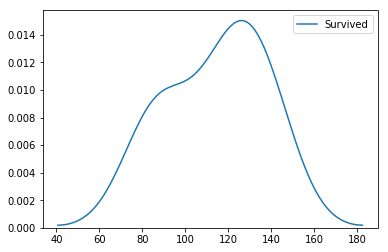

In [85]:
# No : 1 -> Number of passengers survivied from each class

x=train[train['Survived']==1]
y=x.groupby('Pclass')['Survived'].count()

print(y)

print()
print(y.skew())

sns.kdeplot(y)


0    -2
1     5
2    10
Name: Score, dtype: int64

-0.4916130499426069


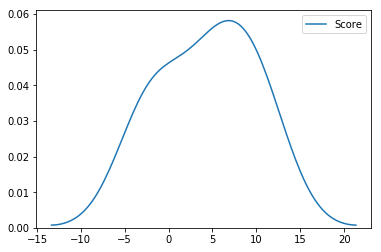

In [82]:
# No : 2 -> Name and Score

x=[['Ram',-2],['Shyam',5],['Tom',10]]

y=pd.DataFrame(x,columns=['Name','Score'])['Score']

print(y)

print()
print(y.skew())

sns.kdeplot(y)

0    -50
1    100
2    200
Name: Number Chosen, dtype: int64

-0.5855827262813871


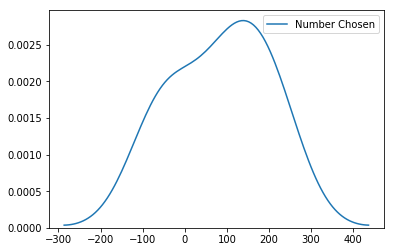

In [129]:
#No : 3 -> Name and Number Chosen

x=[['Ram',-50],['Shyam',100],['Tom',200]]
y=pd.DataFrame(x,columns=['Name','Number Chosen'])['Number Chosen']

print(y)

print()
print(y.skew())

sns.kdeplot(y)